# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
In this task with decision trees, we will use car dataset that is available at OpenMl to predict the car acceptability given the information about the car. We will load it with Sklearn fetch_openml function.
Various features are:
'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'BinaryClass'.

In [4]:
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name='car', version=2)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
type(car_data)

sklearn.utils._bunch.Bunch

In [6]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [7]:
car_data.details['version']

'2'

In [8]:
# Data description
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [9]:
# Displaying feature names
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [10]:
# Getting the whole dataframe
car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [11]:
type(car_data)

pandas.core.frame.DataFrame

### **EDA**
Before exploratory analysis, first we will get the training and test data.

In [12]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(car_data, test_size=0.1, random_state=20)
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 1555 
The size of testing data is: 173


# Summary Statistics

In [13]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1555,1555,1555,1555,1555,1555,1555
unique,4,4,4,3,3,3,2
top,med,low,2,2,med,low,P
freq,402,392,393,521,522,528,1097


In [14]:
train_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
1361,low,vhigh,4,4,small,high,N
1037,med,high,4,4,small,high,N
281,vhigh,med,4,4,small,high,N
865,med,vhigh,2,2,small,med,P
1343,low,vhigh,3,more,small,high,N


# Checking Null Values

In [15]:
train_data.isnull().sum()

buying         0
maint          0
doors          0
persons        0
lug_boot       0
safety         0
binaryClass    0
dtype: int64

# Checking categorical features

In [16]:
train_data['buying'].value_counts()

buying
med      402
vhigh    387
high     385
low      381
Name: count, dtype: int64

<Axes: xlabel='buying', ylabel='count'>

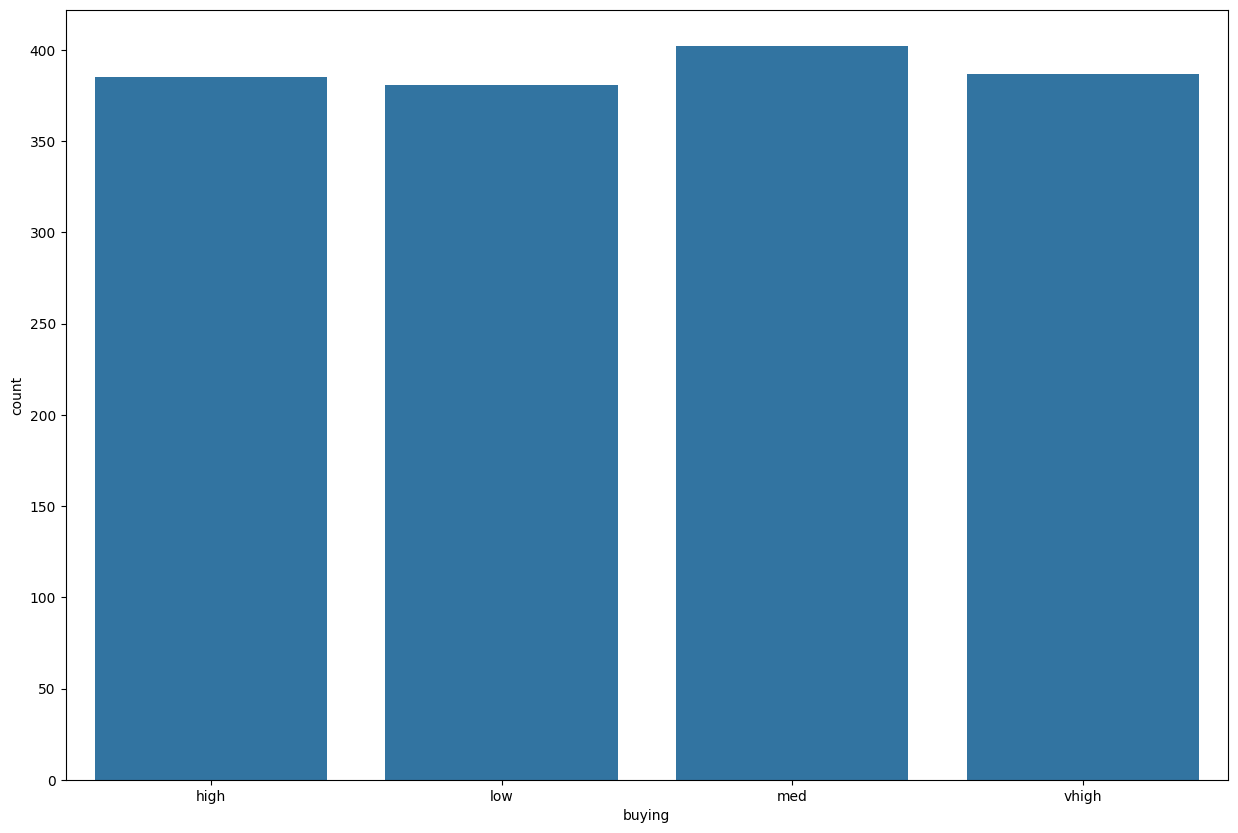

In [17]:
plt.figure(figsize = (15,10))
sns.countplot(data=train_data, x = 'buying')

<Axes: xlabel='buying', ylabel='count'>

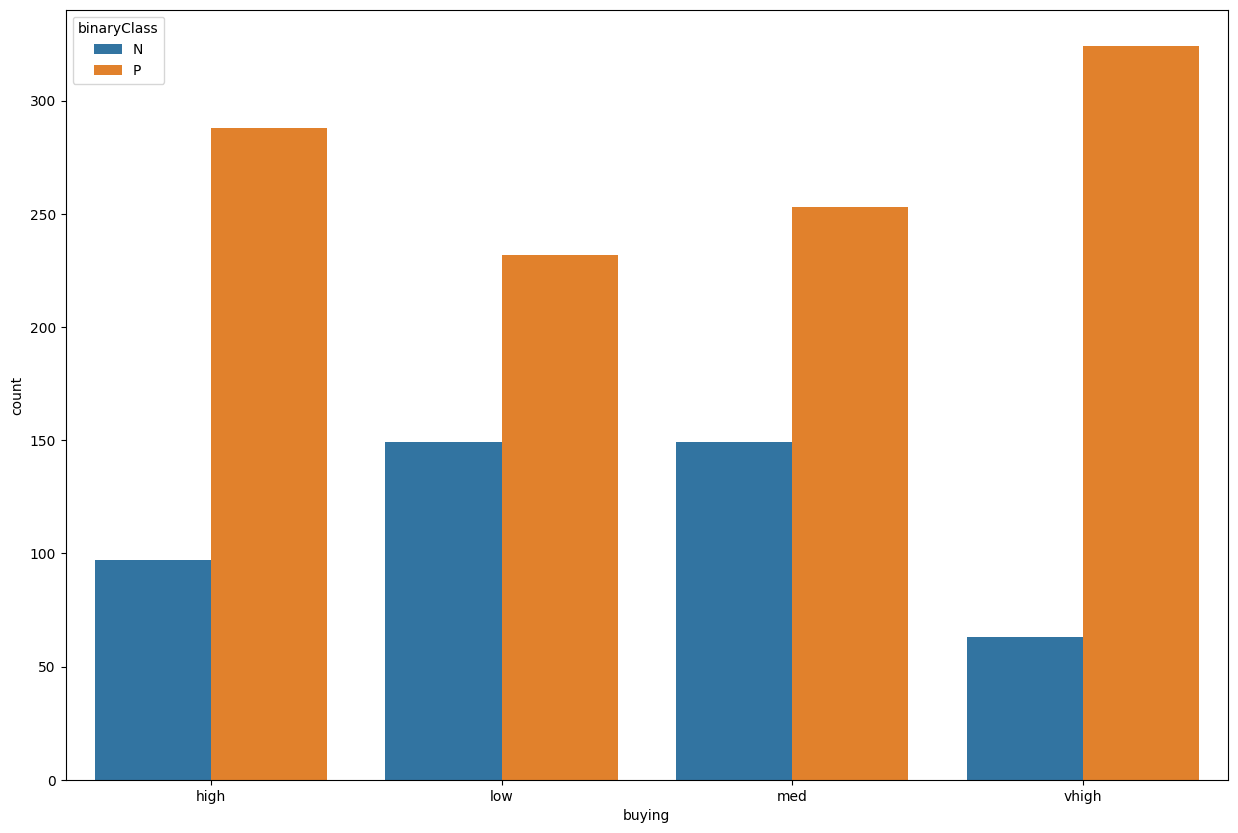

In [18]:
plt.figure(figsize = (15,10))
sns.countplot(data = train_data, x = 'buying', hue = 'binaryClass')

We can see that the majority class in the buying price is median(med).

In [19]:
train_data['maint'].value_counts()

maint
low      392
med      390
high     387
vhigh    386
Name: count, dtype: int64

<Axes: xlabel='maint', ylabel='count'>

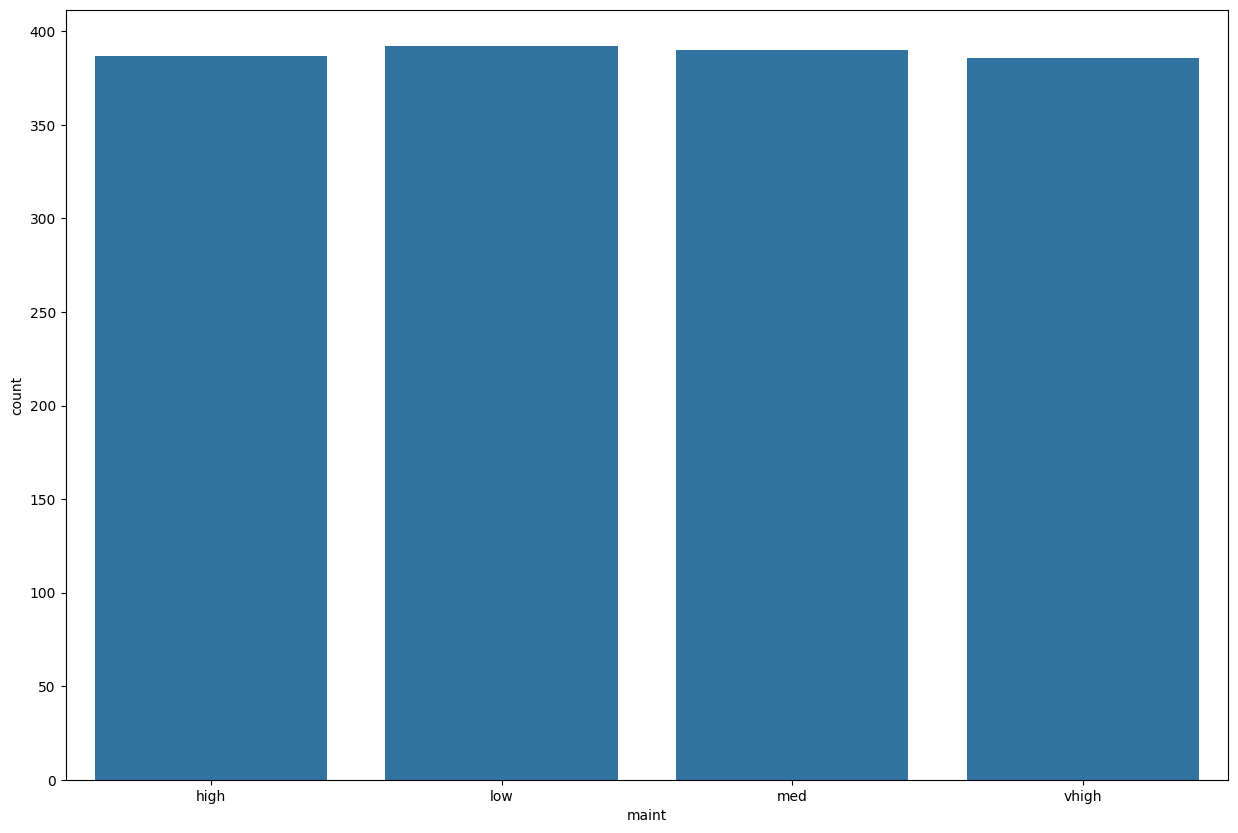

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(data = train_data, x = 'maint')

<Axes: xlabel='maint', ylabel='count'>

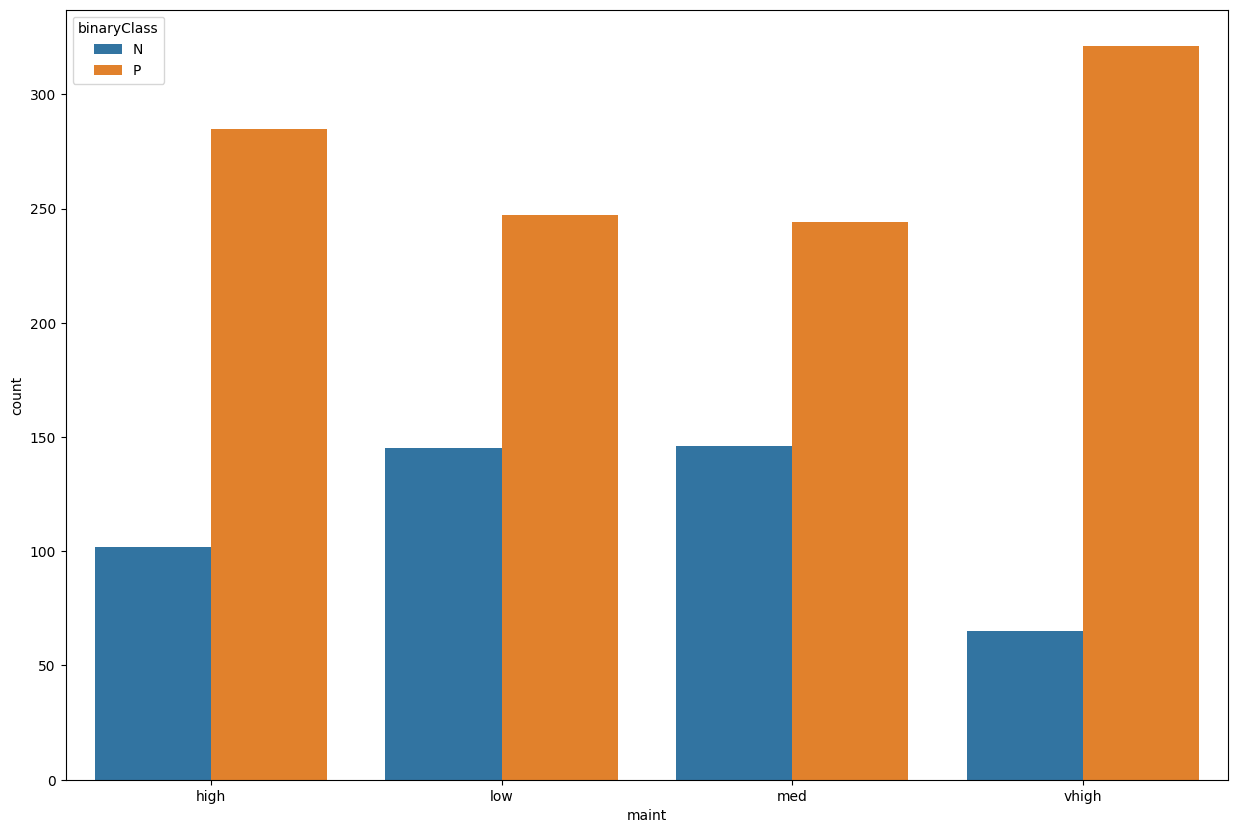

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x = 'maint', hue = 'binaryClass')

<Axes: xlabel='doors', ylabel='count'>

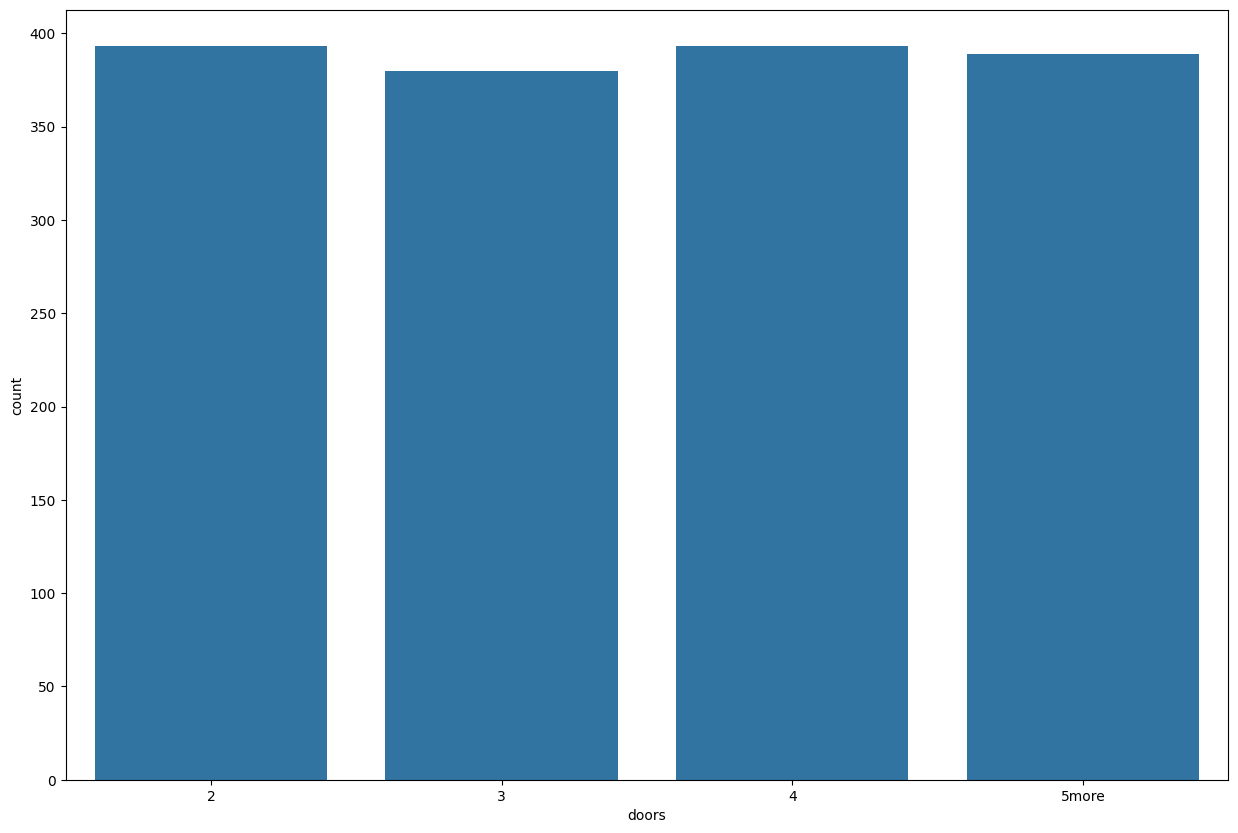

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(data = train_data, x = 'doors')

<Axes: xlabel='doors', ylabel='count'>

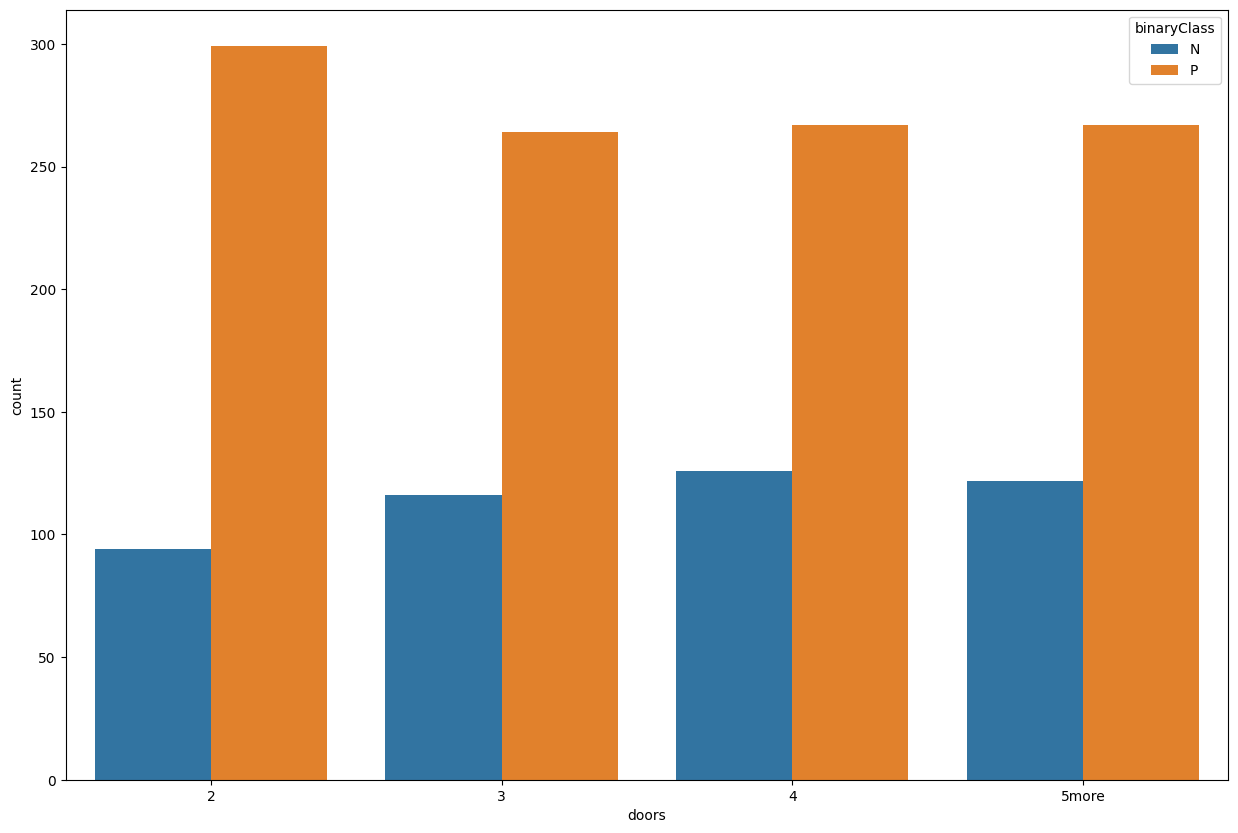

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x = 'doors', hue = 'binaryClass')

<Axes: xlabel='persons', ylabel='count'>

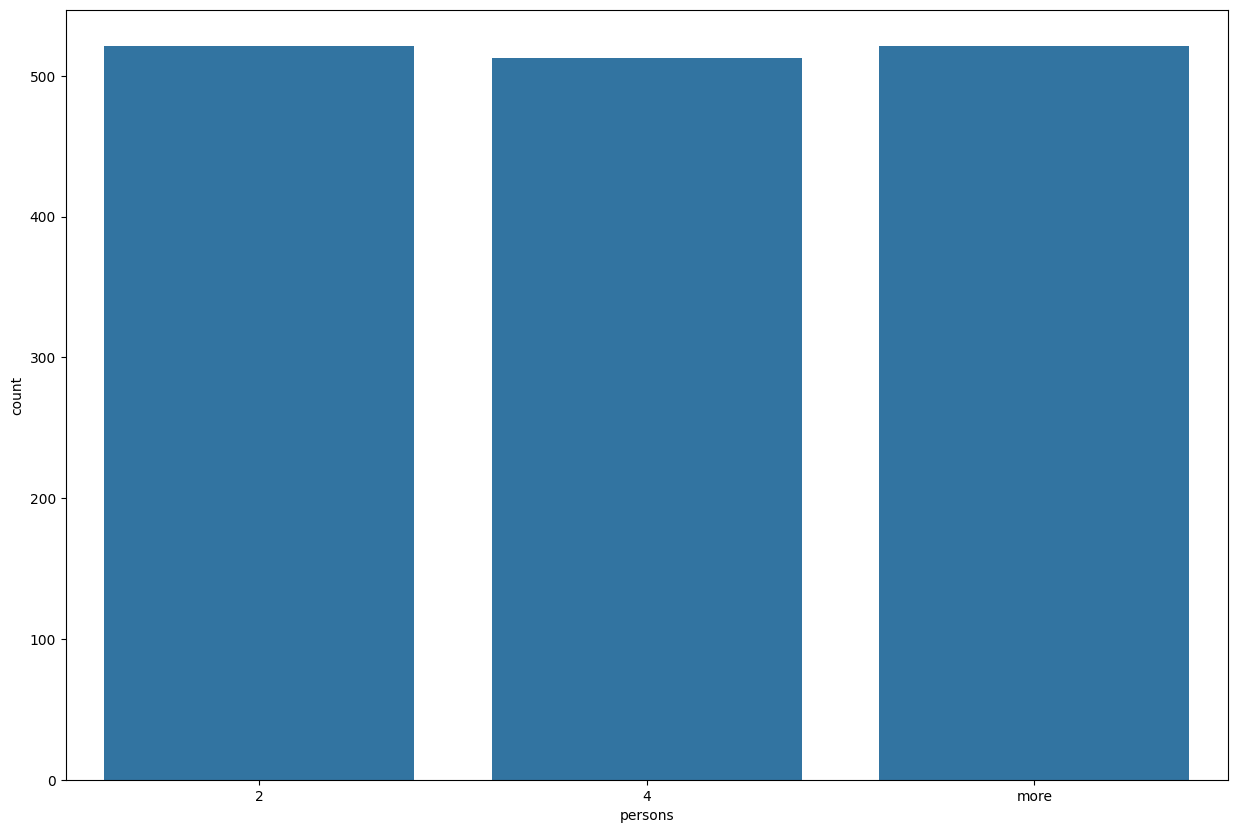

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(data = train_data, x = 'persons')

<Axes: xlabel='persons', ylabel='count'>

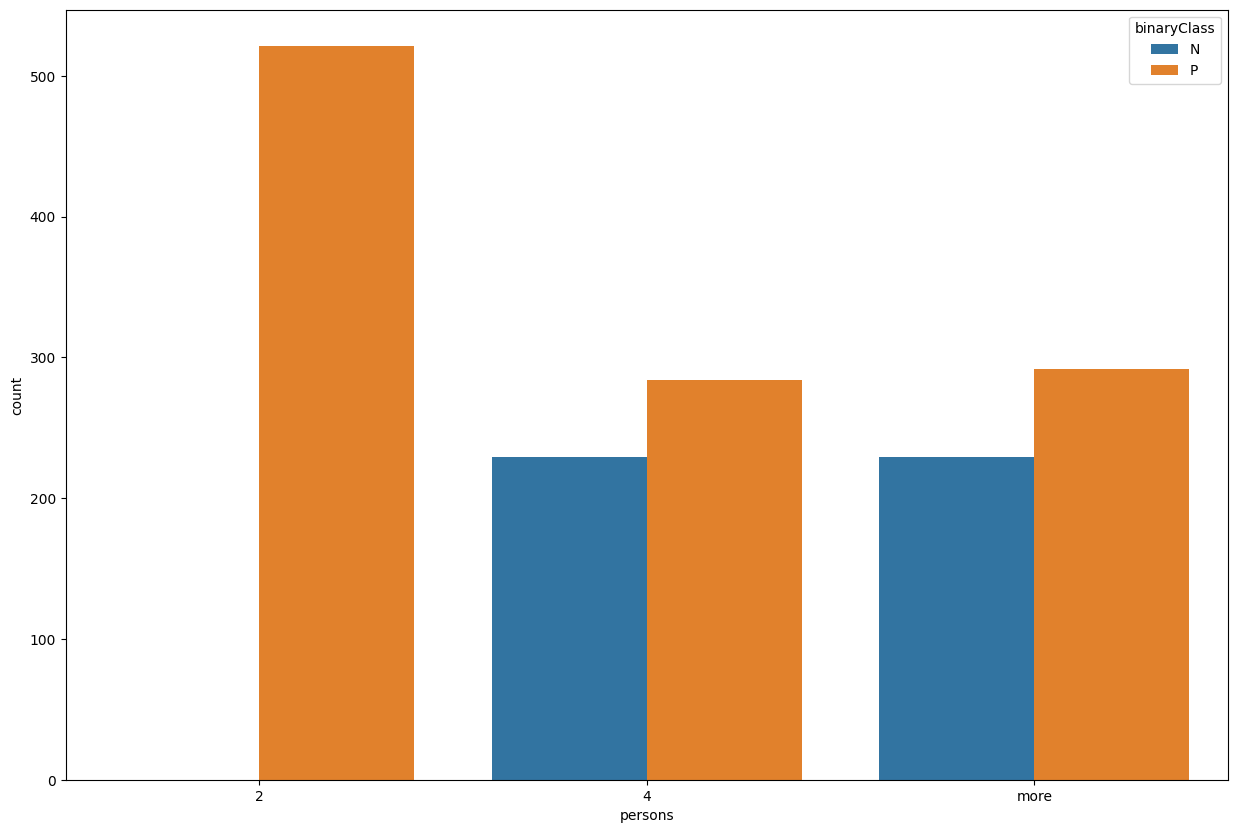

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x = 'persons', hue = 'binaryClass')

<Axes: xlabel='lug_boot', ylabel='count'>

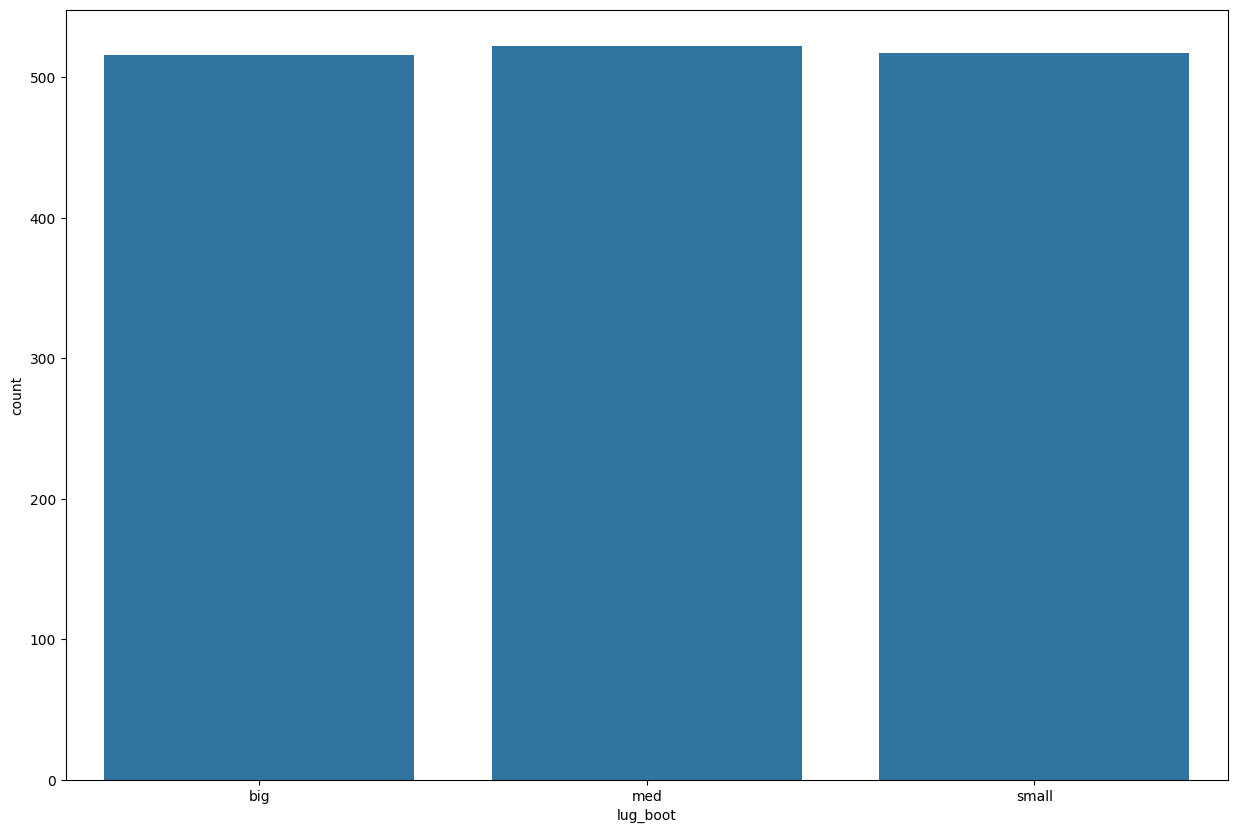

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(data = train_data, x = 'lug_boot')

<Axes: xlabel='lug_boot', ylabel='count'>

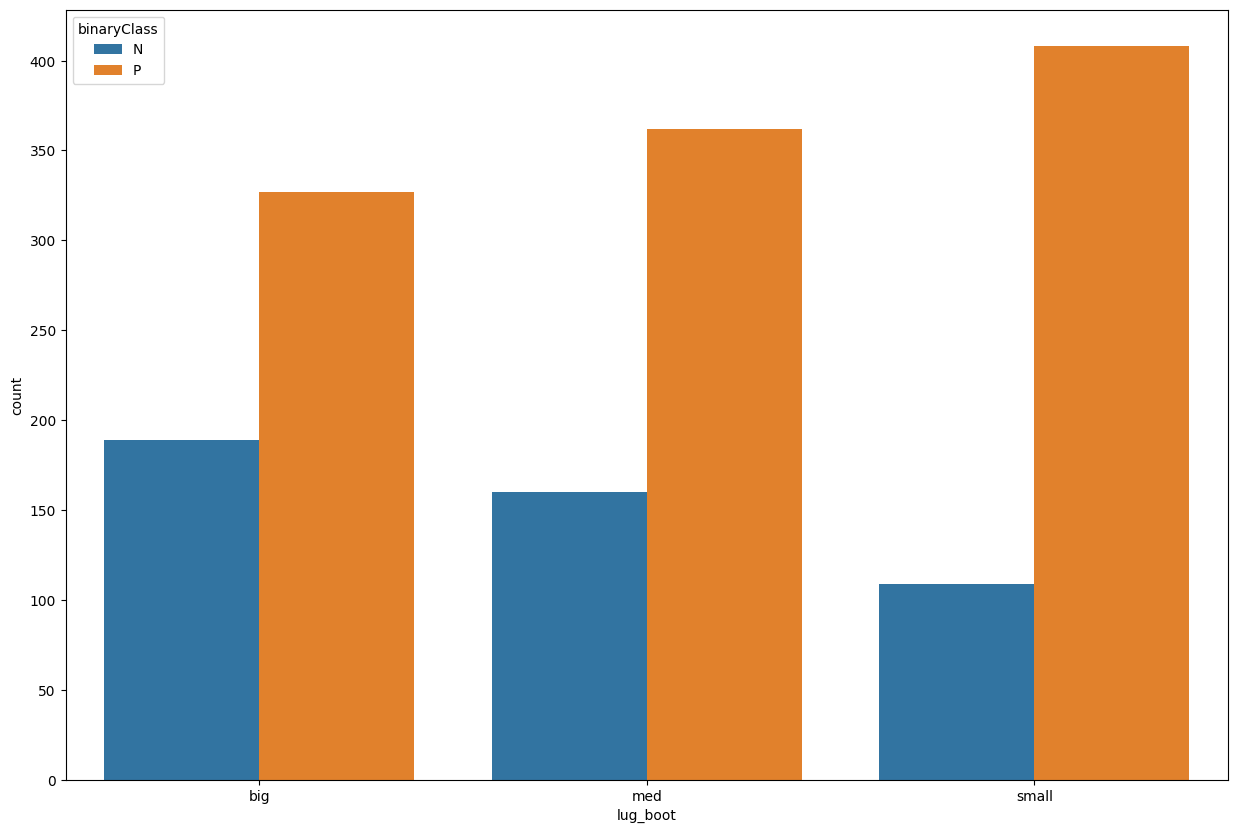

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(data = train_data, x = 'lug_boot', hue='binaryClass')

In [28]:
train_data['safety'].value_counts()

safety
low     528
high    514
med     513
Name: count, dtype: int64

<Axes: xlabel='safety', ylabel='count'>

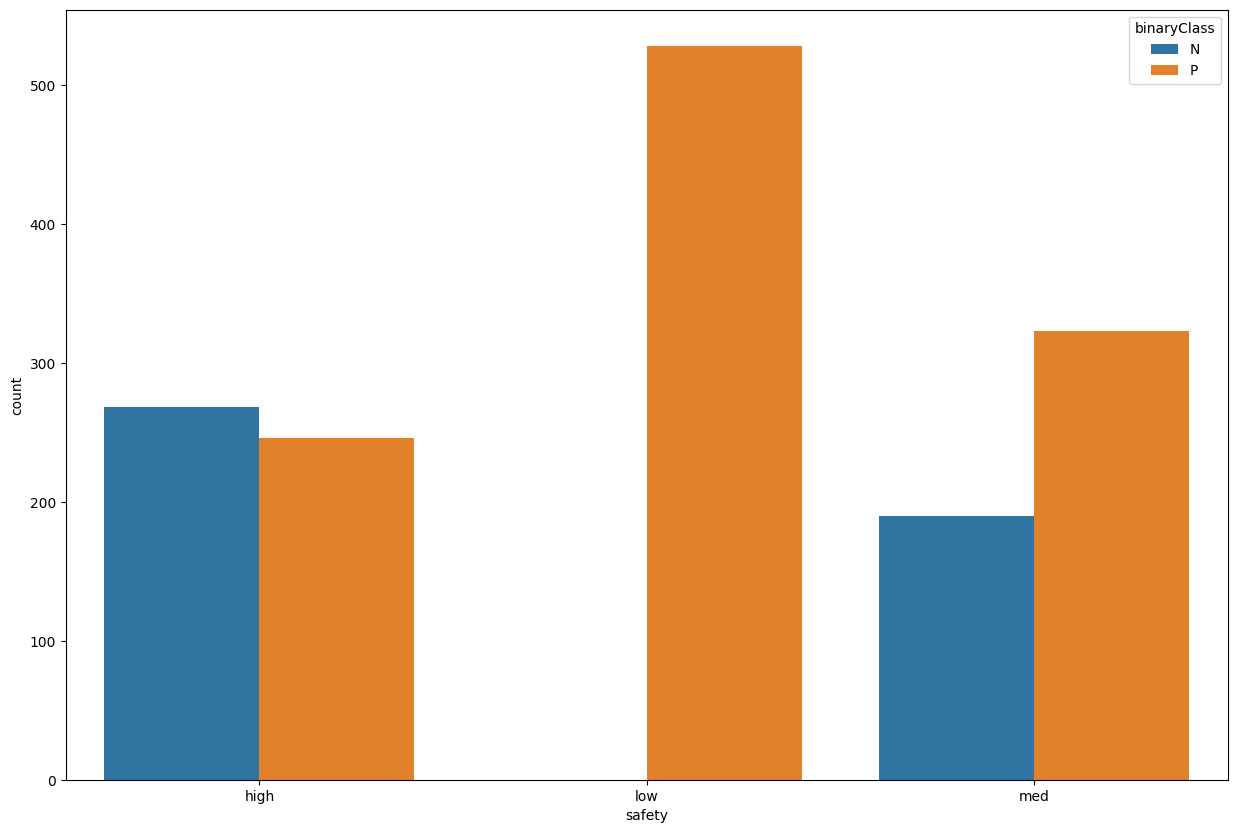

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(data = train_data, x = 'safety', hue = 'binaryClass')

In [30]:
train_data['binaryClass'].value_counts()

binaryClass
P    1097
N     458
Name: count, dtype: int64

<Axes: xlabel='binaryClass', ylabel='count'>

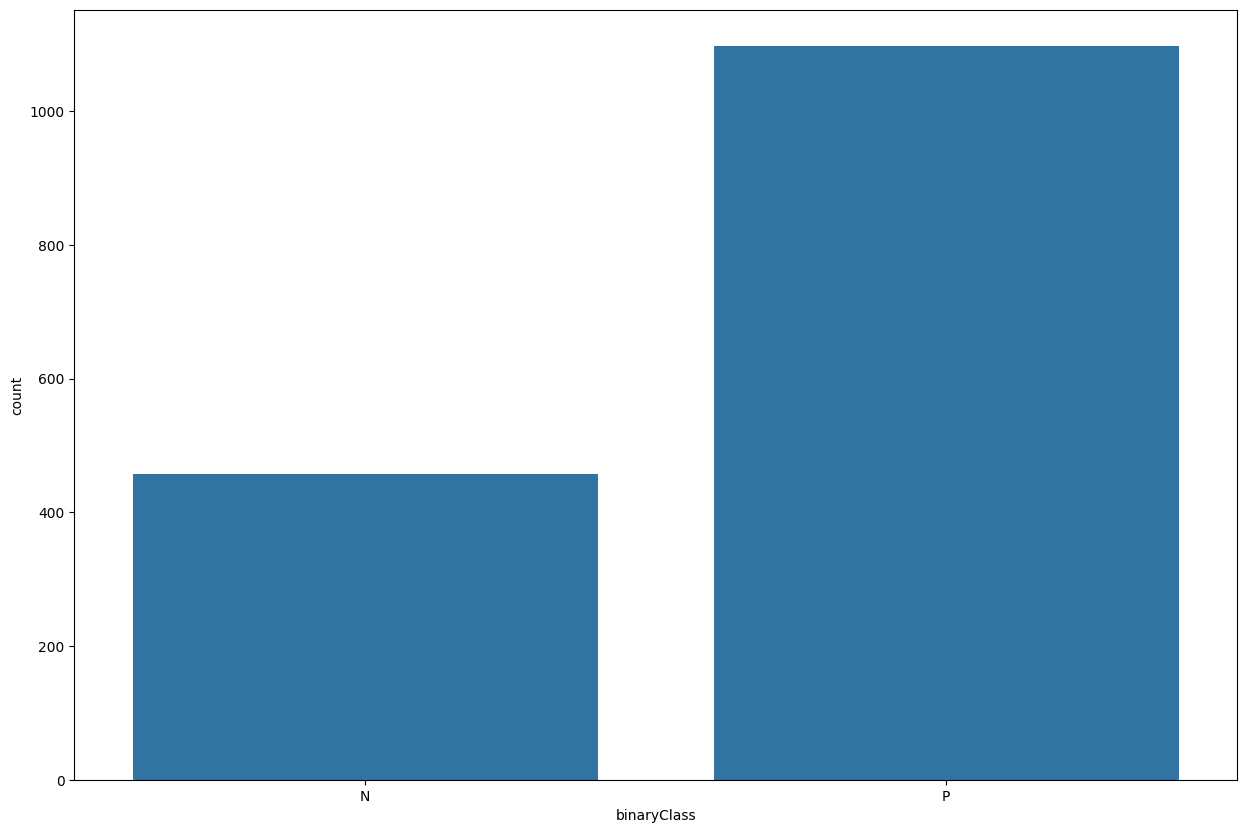

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(data = train_data, x = 'binaryClass')

Here, we can see that our data is completely imbalanced. The positive examples are two times more than the negative examples. So, we will remember that the accuracy is not the right metric in this case.

# **Data Preprocessing**
Here we prepare the data to be in proper format for machine learning model.

# Handling Categorical Features

Before handling categorical features, let's create training input data and labels.

In [32]:
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]

Let's create a pipeline to encode all features in the training input data.

In [33]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ord_enc', OrdinalEncoder())
])
car_train_prepared = pipe.fit_transform(car_train)

Now we will handle the labels. Labels contain P and N, so we want to convert these into numbers. Here, we will use Label Encoder.

In [34]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
car_labels_prepared = label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Training Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier()

# Evaluating Decision Trees
We will build 3 functions to display accuracy, confusion matrix, and classification report.

In [36]:
from sklearn.metrics import accuracy_score
def accuracy(input_data, model, labels):
  preds = model.predict(input_data)
  acc = accuracy_score(labels,preds)
  return acc

In [37]:
from sklearn.metrics import confusion_matrix
def conf_matrix(input_data, model, labels):
  preds = model.predict(input_data)
  cm = confusion_matrix(labels,preds)
  return cm

In [38]:
from sklearn.metrics import classification_report
def class_report(input_data, model, labels):
  preds = model.predict(input_data)
  report = classification_report(labels,preds)
  report = print(report)
  return report

Finding accuracy on the training set.

In [39]:
accuracy(car_train_prepared, tree_clf, car_labels_prepared)

1.0

Here we can see that the decision trees overfitted the dataset. Also, our data is not balanced.

In [40]:
conf_matrix(car_train_prepared, tree_clf, car_labels_prepared)

array([[ 458,    0],
       [   0, 1097]])

In [41]:
class_report(car_train_prepared, tree_clf, car_labels_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       1.00      1.00      1.00      1097

    accuracy                           1.00      1555
   macro avg       1.00      1.00      1.00      1555
weighted avg       1.00      1.00      1.00      1555



The model clearly overfitted the data.

# **Improving Decision Tree**

In [42]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

One way to avoid overfitting is to reduce the maximum depth of the tree. Also, I set the class_weight to balanced because our dataset is imbalanced. By doing this, the model will automatically adjust the class weight based on the number of available samples in all classes.
We will use GridSearch to find the best values of these hyperparameters.

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
from sklearn.model_selection import GridSearchCV
params_grid = {'max_leaf_nodes': list(range(0,10)),
               'min_samples_split': [0,1,2,3,4],
               'min_samples_leaf': [0,1,2,3,4],
               'max_depth': [0,1,2,3,4,5],
               'max_features': [0,1,2,3,4,5],
               'max_leaf_nodes': [0,1,2,3,4,5]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 42, class_weight='balanced'), params_grid, verbose = 1, cv=3, refit=True)
grid_search.fit(car_train_prepared, car_labels_prepared)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [45]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [46]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       max_leaf_nodes=5, random_state=42)

In [47]:
tree_best = grid_search.best_estimator_

In [48]:
car_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

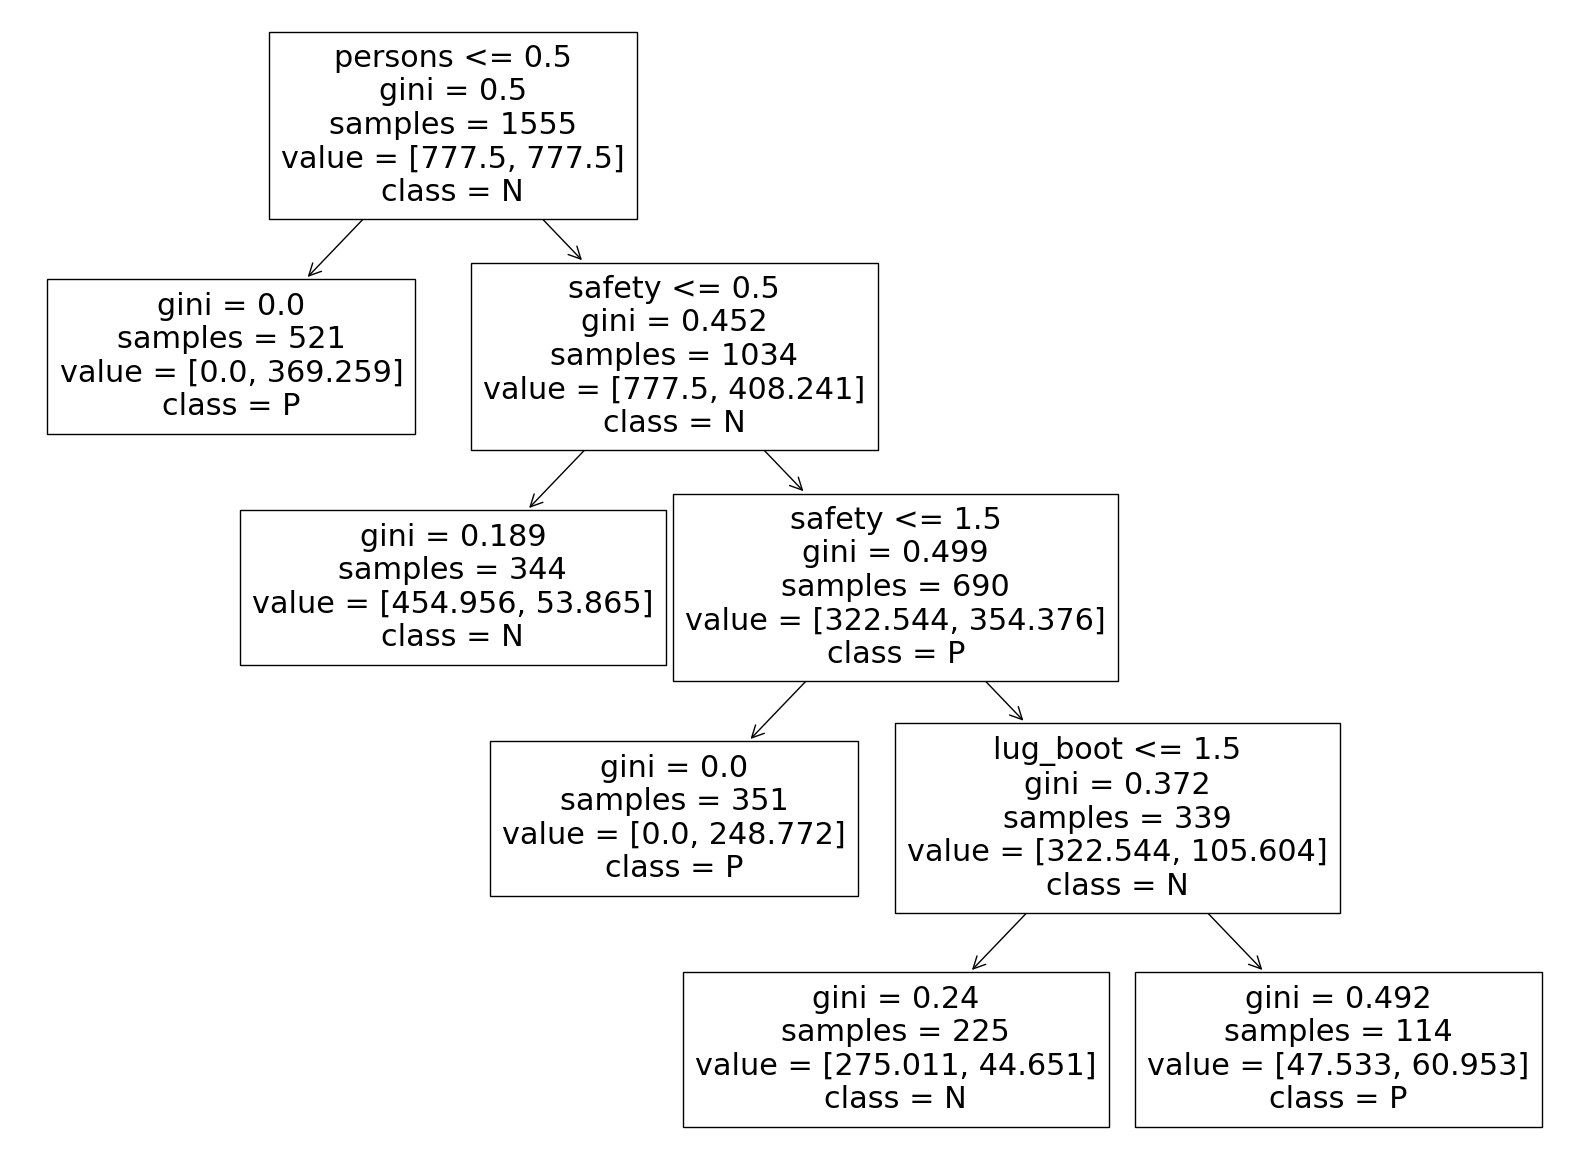

In [49]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,15))
plot_tree(tree_best, feature_names = car_train.columns, class_names = ['N','P']);

Let's make predictions on the training data again.

In [50]:
accuracy(car_train_prepared,tree_best,car_labels_prepared)

0.8926045016077171

In [51]:
conf_matrix(car_train_prepared, tree_best, car_labels_prepared)

array([[430,  28],
       [139, 958]])

In [52]:
class_report(car_train_prepared, tree_best, car_labels_prepared)

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       458
           1       0.97      0.87      0.92      1097

    accuracy                           0.89      1555
   macro avg       0.86      0.91      0.88      1555
weighted avg       0.91      0.89      0.90      1555



This one is much better and we have improved our model.

# `Evaluating the model in the test set
As our model is now improved, now we can feed it to the test set.`
Also, we will apply the same processing functions that we applied to the training set.

In [53]:
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']

In [54]:
# Handling categorical features with pipeline that we defined earlier
car_test_prepared = pipe.transform(car_test)

In [55]:
# Handling labels
car_test_labels_prepared = label_enc.transform(car_test_labels)

Now, we can make predictions on the test set.

In [56]:
accuracy(car_test_prepared, tree_best, car_test_labels_prepared)

0.8554913294797688

In [57]:
conf_matrix(car_test_prepared, tree_best, car_test_labels_prepared)

array([[53,  7],
       [18, 95]])

In [58]:
class_report(car_test_prepared, tree_best, car_test_labels_prepared)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        60
           1       0.93      0.84      0.88       113

    accuracy                           0.86       173
   macro avg       0.84      0.86      0.85       173
weighted avg       0.87      0.86      0.86       173



The results, as we can see is remarkable. The model can generallise well on the test set because we improved it in the right ways.